In [1]:
import filter
import IO
import settings
import numpy as np
import json
import os
import pickle 
from matplotlib import pyplot as plt
import scipy
import mne

In [2]:
with open('settings\\settings.json', 'rb') as f:
        settings = json.load(f)

In [3]:
settings

{'BIDS_path': 'C:\\Users\\icn_admin\\OneDrive - Charité - Universitätsmedizin Berlin\\Data\\BIDS Berlin',
 'out_path': 'C:\\Users\\ICN_admin\\Documents\\icn\\icn_m1\\restructure\\BIDS_Berlin_M1',
 'resamplingrate': 10,
 'max_dist_cortex': 20,
 'max_dist_subcortex': 5,
 'normalization_time': 10,
 'frequencyranges': [[4, 8],
  [8, 12],
  [13, 20],
  [20, 35],
  [13, 35],
  [60, 80],
  [90, 200],
  [60, 200]],
 'seglengths': [1, 2, 2, 3, 3, 3, 10, 10, 10]}

In [4]:
ieeg_files = IO.get_all_ieeg_files(settings['BIDS_path'])

In [5]:
ieeg_files

['C:\\Users\\icn_admin\\OneDrive - Charité - Universitätsmedizin Berlin\\Data\\BIDS Berlin\\sub-002\\ses-20200130\\ieeg\\sub-002_ses-20200130_task-restMEDON20200130T111458_run-0_ieeg.vhdr',
 'C:\\Users\\icn_admin\\OneDrive - Charité - Universitätsmedizin Berlin\\Data\\BIDS Berlin\\sub-002\\ses-20200130\\ieeg\\sub-002_ses-20200130_task-restMEDONAVGREF20200130T112142_run-1_ieeg.vhdr',
 'C:\\Users\\icn_admin\\OneDrive - Charité - Universitätsmedizin Berlin\\Data\\BIDS Berlin\\sub-002\\ses-20200131\\ieeg\\sub-002_ses-20200131_task-evoked202001310001_run-0_ieeg.vhdr',
 'C:\\Users\\icn_admin\\OneDrive - Charité - Universitätsmedizin Berlin\\Data\\BIDS Berlin\\sub-002\\ses-20200131\\ieeg\\sub-002_ses-20200131_task-evoked202001310002_run-1_ieeg.vhdr',
 'C:\\Users\\icn_admin\\OneDrive - Charité - Universitätsmedizin Berlin\\Data\\BIDS Berlin\\sub-002\\ses-20200131\\ieeg\\sub-002_ses-20200131_task-evoked202001310003_run-2_ieeg.vhdr',
 'C:\\Users\\icn_admin\\OneDrive - Charité - Universitätsmediz

In [6]:
subject, run, sess = IO.get_sess_run_subject(ieeg_files[0])

In [7]:
subject

'002'

In [8]:
run

'0'

In [9]:
sess

'20200130'

In [10]:
sf=IO.read_run_sampling_frequency(ieeg_files[0])

In [11]:
sf

0     4098.360656
1     4098.360656
2     4098.360656
3     4098.360656
4     4098.360656
5     4098.360656
6     4098.360656
7     4098.360656
8     4098.360656
9     4098.360656
10    4098.360656
11    4098.360656
12    4098.360656
13    4098.360656
14    4098.360656
15    4098.360656
16    4098.360656
17    4098.360656
18    4098.360656
19    4098.360656
20    4098.360656
21    4098.360656
22    4098.360656
23    4098.360656
24    4098.360656
25    4098.360656
26    4098.360656
Name: sampling_frequency, dtype: float64

In [12]:
line_noise = IO.read_line_noise(settings['BIDS_path'],"002") # the line noise column is missing in the 
# participants.tsv

In [13]:
sf[0]

4098.360655737705

In [14]:
line_noise

50

### adapt the filter function! 

In [24]:
# this had been necessary due to an error calculating the MNE filters in MNE
if sf[0]>1000:
    filter_len=sf
else:
    filter_len=1001
    
# but in general, set the filter length to the sampling frequency
filter_len = int(np.ceil(sf[0]))

In [25]:
filter_len

4099

In [26]:
settings['frequencyranges']

[[4, 8], [8, 12], [13, 20], [20, 35], [13, 35], [60, 80], [90, 200], [60, 200]]

In [27]:
settings['seglengths'] # in Hz

[1, 2, 2, 3, 3, 3, 10, 10, 10]

In [74]:
fs = 4099

In [75]:
filter_fun = filter.calc_band_filters(settings['frequencyranges'], sample_rate=fs, filter_len=filter_len)

No data specified. Sanity checks related to the length of the signal relative to the filter order will be skipped.
Setting up band-pass filter from 4 - 8 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 4.00 Hz (-6 dB cutoff frequency: 2.00 Hz)
- Upper passband edge: 8.00 Hz
- Upper transition bandwidth: 4.00 Hz (-6 dB cutoff frequency: 10.00 Hz)
- Filter length: 4099 samples (1.000 sec)

No data specified. Sanity checks related to the length of the signal relative to the filter order will be skipped.
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB s

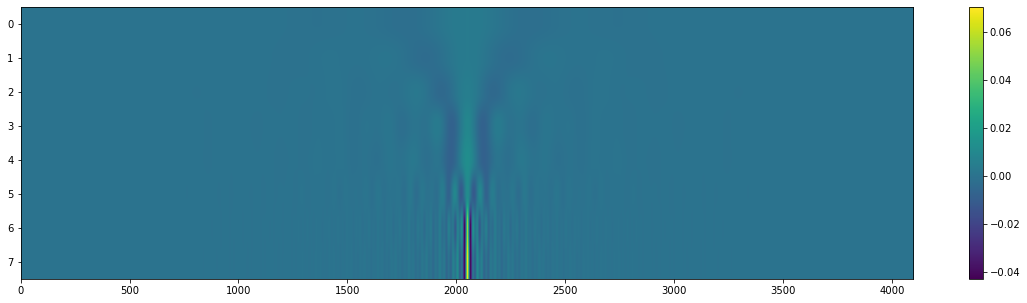

In [76]:
plt.figure(figsize=(20,5))
plt.imshow(filter_fun, aspect='auto')
plt.colorbar()
plt.show()

In [78]:
offset_start = int(np.ceil(settings["seglengths"][0] * fs))

In [79]:
offset_start

4099

In [42]:
ieeg_raw, ch_names = IO.read_BIDS_file(ieeg_files[0])

Extracting parameters from C:\Users\icn_admin\OneDrive - Charité - Universitätsmedizin Berlin\Data\BIDS Berlin\sub-002\ses-20200130\ieeg\sub-002_ses-20200130_task-restMEDON20200130T111458_run-0_ieeg.vhdr...
Setting channel info structure...


In [43]:
ch_names

['CREF',
 'LFP_BS_STN_R_1',
 'LFP_BS_STN_R_2',
 'LFP_BS_STN_R_3',
 'LFP_BS_STN_R_4',
 'LFP_BS_STN_R_5',
 'LFP_BS_STN_R_6',
 'LFP_BS_STN_R_7',
 'LFP_BS_STN_R_8',
 'LFP_BS_STN_L_1',
 'LFP_BS_STN_L_2',
 'LFP_BS_STN_L_3',
 'LFP_BS_STN_L_4',
 'LFP_BS_STN_L_5',
 'LFP_BS_STN_L_6',
 'LFP_BS_STN_L_7',
 'LFP_BS_STN_L_8',
 'EEG_TM_Cz__1',
 'EEG_TM_Cz__2',
 'ECOG_AT_SM_L_1',
 'ECOG_AT_SM_L_2',
 'ECOG_AT_SM_L_3',
 'ECOG_AT_SM_L_4',
 'ECOG_AT_SM_L_5',
 'ECOG_AT_SM_L_6',
 'EMG_TM_BR_R_1',
 'EMG_TM_BR_L_1']

In [44]:
ieeg_raw.shape

(27, 1232738)

### now call / rewrite run file

In [46]:
#given the ieeg raw file write a generator
def ieeg_raw_generator(ieeg_raw, fs, fs_new, offset_start):
     
    cnt_fsnew = 0
    for cnt in range(ieeg_raw.shape[1]):
        if cnt < offset_start:
            cnt_fsnew +=1
            continue
        
        cnt_fsnew +=1
        if cnt_fsnew >= (fs/fs_new):
            cnt_fsnew = 0
            yield ieeg_raw[:,cnt-offset_start:cnt]

In [80]:
gen_ = ieeg_raw_generator(ieeg_raw, fs=fs, fs_new=10, offset_start=offset_start)

In [247]:
settings["resamplingrate"]

10

In [ ]:
# call apply_filter function 
# apply_filter: notch filter and filter convoluation 

In [81]:
arr = next(gen_)

In [82]:
dat_notch_filtered = mne.filter.notch_filter(x=arr.T, Fs=fs, trans_bandwidth=7,
            freqs=np.arange(50, 4*50, 50),
            fir_design='firwin', verbose=False, notch_widths=1,filter_length=arr.T.shape[0]-1)

<ipython-input-82-5a1408800f77>:3: RuntimeWarning: filter_length (4099) is longer than the signal (27), distortion is likely. Reduce filter length or filter a longer signal.
  fir_design='firwin', verbose=False, notch_widths=1,filter_length=arr.T.shape[0]-1)


In [83]:
dat_notch_filtered.shape

(4099, 27)

In [84]:
filter_fun.shape

(8, 4099)

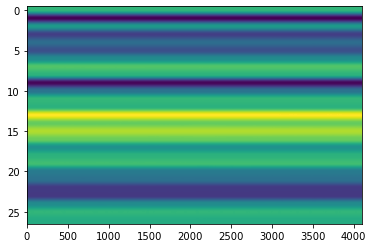

In [85]:
plt.imshow(dat_notch_filtered.T, aspect='auto')
plt.show()

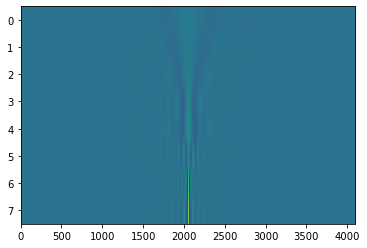

In [86]:
plt.imshow(filter_fun, aspect='auto')
plt.show()

In [94]:
filter_fun.shape

(8, 4099)

In [93]:
dat_notch_filtered.shape

(4099, 27)

In [89]:
(4096/np.array(settings["seglengths"])).astype(int)

array([4096, 2048, 2048, 1365, 1365, 1365,  409,  409,  409])

In [98]:
dat_filt = filter.apply_filter(arr.T, sample_rate=fs, \
                               filter_fun=filter_fun.T,
                               line_noise=50, seglengths=(fs/np.array(settings["seglengths"])).astype(int))

C:\code\icn\icn_m1\restructure\filter.py:72: RuntimeWarning: filter_length (4099) is longer than the signal (27), distortion is likely. Reduce filter length or filter a longer signal.
  fir_design='firwin', verbose=False, notch_widths=1,filter_length=dat_.shape[0]-1)


ValueError: volume and kernel should have the same dimensionality

In [101]:
dat_ = arr.T
sample_rate = fs
filter_fun = filter_fun
line_noise = line_noise
variance=True
seglengths=(fs/np.array(settings["seglengths"])).astype(int)

In [114]:
dat_noth_filtered = mne.filter.notch_filter(x=dat_, Fs=sample_rate, trans_bandwidth=7,
            freqs=np.arange(line_noise, 4*line_noise, line_noise),
            fir_design='firwin', verbose=False, notch_widths=1,filter_length=dat_.shape[0]-1)

<ipython-input-114-e667d12fe972>:3: RuntimeWarning: filter_length (4099) is longer than the signal (27), distortion is likely. Reduce filter length or filter a longer signal.
  fir_design='firwin', verbose=False, notch_widths=1,filter_length=dat_.shape[0]-1)


In [108]:
np.expand_dims(filter_fun[filt,:], axis=1).shape

(4099, 1)

In [107]:
dat_noth_filtered.shape

(4099, 27)

In [113]:
scipy.signal.convolve?

In [110]:
filtered = []

for filt in range(filter_fun.shape[0]):
    if variance:
        filtered.append(np.var(scipy.signal.convolve(filter_fun[filt,:], \
                                           dat_noth_filtered[:,5], mode='same')[-seglengths[filt]:]))
    else:
        # filtered.append(scipy.signal.convolve(filter_fun[filt,:], 
        #                                     dat_noth_filtered, mode='same')[-seglengths[filt]:])
        filtered.append(scipy.signal.convolve(filter_fun[filt,:] , \
                                            dat_noth_filtered, mode='same'))

In [112]:
filtered

[12047960.374935554,
 3528808.9923731694,
 1789123.547775341,
 1758856.5351953262,
 3888250.3203928843,
 319663.9213517903,
 1394622.6310177695,
 2650913.889701031]

In [53]:
settings["seglengths"]

[1, 2, 2, 3, 3, 3, 10, 10, 10]

In [94]:
4096/np.array(settings["seglengths"])

array([4096.        , 2048.        , 2048.        , 1365.33333333,
       1365.33333333, 1365.33333333,  409.6       ,  409.6       ,
        409.6       ])

In [97]:
(4096/np.array(settings["seglengths"])).astype(int)

array([4096, 2048, 2048, 1365, 1365, 1365,  409,  409,  409])

In [100]:
filter_fun.shape

(8, 4099)

In [108]:
arr.shape[0]-1

26

<ipython-input-111-af4568edbcd1>:3: RuntimeWarning: filter_length (4095) is longer than the signal (27), distortion is likely. Reduce filter length or filter a longer signal.
  fir_design='firwin', verbose=False, notch_widths=1,filter_length=arr.T.shape[0]-1)


In [110]:
from mne import viz

In [113]:
info = mne.create_info(ch_names, 4096, ch_types='ecog')
raw = mne.io.RawArray(arr, info)

Creating RawArray with float64 data, n_channels=27, n_times=4096
    Range : 0 ... 4095 =      0.000 ...     1.000 secs
Ready.


In [125]:
ch_names

['CREF',
 'LFP_BS_STN_R_1',
 'LFP_BS_STN_R_2',
 'LFP_BS_STN_R_3',
 'LFP_BS_STN_R_4',
 'LFP_BS_STN_R_5',
 'LFP_BS_STN_R_6',
 'LFP_BS_STN_R_7',
 'LFP_BS_STN_R_8',
 'LFP_BS_STN_L_1',
 'LFP_BS_STN_L_2',
 'LFP_BS_STN_L_3',
 'LFP_BS_STN_L_4',
 'LFP_BS_STN_L_5',
 'LFP_BS_STN_L_6',
 'LFP_BS_STN_L_7',
 'LFP_BS_STN_L_8',
 'EEG_TM_Cz__1',
 'EEG_TM_Cz__2',
 'ECOG_AT_SM_L_1',
 'ECOG_AT_SM_L_2',
 'ECOG_AT_SM_L_3',
 'ECOG_AT_SM_L_4',
 'ECOG_AT_SM_L_5',
 'ECOG_AT_SM_L_6',
 'EMG_TM_BR_R_1',
 'EMG_TM_BR_L_1']

Effective window size : 0.500 (s)


<ipython-input-128-a638265c3c62>:1: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.plot_psd(picks=["ECOG_AT_SM_L_1", "ECOG_AT_SM_L_2", "ECOG_AT_SM_L_3"])


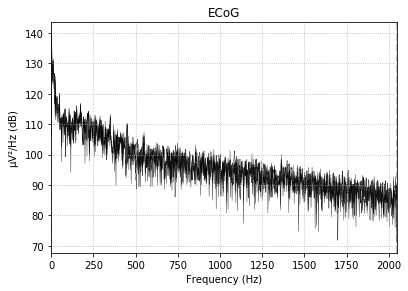

In [128]:
raw.plot_psd(picks=["ECOG_AT_SM_L_1", "ECOG_AT_SM_L_2", "ECOG_AT_SM_L_3"])
plt.show()

In [98]:
dat_filt = filter.apply_filter(arr, sample_rate=4096, filter_fun=a, \
                               line_noise=50, seglengths=(4096/np.array(settings["seglengths"])).astype(int))

ValueError: The requested filter length 27 is too short for the requested 1.75 Hz transition band, which requires 3863 samples

In [116]:
if arr is None:
    print("true")

In [130]:
def gen_here():
    for i in range(5):
        yield i

In [131]:
gen = gen_here()

In [140]:
print(next(gen, None))

None


### test run function

In [205]:
def run(gen, seglengths, f_ranges, line_noise, fs, fs_new, filter_fun, num_channels, clip_low=-2, clip_high=2, usemean_=True, normalize=True,\
        normalize_time=30):

    num_features = 8 # later important to be distinguishible for different features
    feature_arr = np.zeros([1, num_channels, num_features])
    
    cnt_samples = 0 
    
    if normalize is True:
        normalize_samples = int(normalize_time*fs_new)
        feature_arr_norm = np.zeros(feature_arr.shape)
    while True:
        ieeg_batch = next(gen, None)
        
        if ieeg_batch is None: 
            if normalize is True:
                return feature_arr_norm
            else: 
                return feature_arr
        
        # notch filter and feature estimation
        features_sample = np.zeros([num_channels,num_features])
        for ch_idx, ch in enumerate(np.arange(0,num_channels,1)):
            dat_filt = filter.apply_filter(ieeg_batch[ch_idx,:], sample_rate=fs, filter_fun=filter_fun, line_noise=line_noise, seglengths=(fs/seglengths).astype(int))
            features_sample[ch_idx,:] = dat_filt
        
        feature_arr = np.concatenate((feature_arr, np.expand_dims(features_sample, axis=0)), axis=0)

        if normalize is True:
            
            if cnt_samples < normalize_samples:
                if cnt_samples == 0:
                    n_idx = 0
                else:
                    n_idx = np.arange(0,cnt_samples,1)
            else:
                n_idx = np.arange(cnt_samples-normalize_samples, cnt_samples, 1)

            if cnt_samples == 0:
                feature_arr_norm[n_idx,:,:] = np.clip(feature_arr[n_idx,:,:], clip_low, clip_high)
            else:
                if usemean_ is True:   
                    norm_previous = np.mean(feature_arr[n_idx,:,:], axis=0)
                else:
                    norm_previous = np.median(feature_arr[n_idx,:,:], axis=0)
                    
                feature_norm = (feature_arr[cnt_samples,:,:] - norm_previous) / norm_previous
                feature_norm = np.clip(feature_norm, clip_low, clip_high)
                feature_arr_norm = np.concatenate((feature_arr_norm, np.expand_dims(feature_norm,axis=0)), axis=0) 
            cnt_samples += 1
            print(cnt_samples)

In [176]:
fs

4099

In [150]:
fs_new = 10

In [152]:
offset_start

4099

In [210]:
ieeg_raw.shape

(27, 1232738)

In [212]:
gen = ieeg_raw_generator(ieeg_raw[:,:40000], fs, fs_new, offset_start)

In [154]:
seglengths

array([4099, 2049, 2049, 1366, 1366, 1366,  409,  409,  409])

In [248]:
!pip install cvxpy

  Running setup.py clean for ecos
  Running setup.py clean for scs
Failed to build ecos scs
    Running setup.py install for ecos: started
    Running setup.py install for ecos: finished with status 'error'


  ERROR: Command errored out with exit status 1:
   command: 'C:\code\Anaconda3\python.exe' -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\ICN_AD~1\\AppData\\Local\\Temp\\pip-install-oeor8zir\\ecos\\setup.py'"'"'; __file__='"'"'C:\\Users\\ICN_AD~1\\AppData\\Local\\Temp\\pip-install-oeor8zir\\ecos\\setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\ICN_AD~1\AppData\Local\Temp\pip-wheel-7pps7ckg'
       cwd: C:\Users\ICN_AD~1\AppData\Local\Temp\pip-install-oeor8zir\ecos\
  Complete output (12 lines):
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-3.7
  creating build\lib.win-amd64-3.7\ecos
  copying src\ecos\ecos.py -> build\lib.win-amd64-3.7\ecos
  copying src\ecos\version.py -> build\lib.win-amd64-3.7\ecos
  copying src\ecos\__init__.py -> build\lib.win-amd64

In [157]:
settings

{'BIDS_path': 'C:\\Users\\icn_admin\\OneDrive - Charité - Universitätsmedizin Berlin\\Data\\BIDS Berlin',
 'out_path': 'C:\\Users\\ICN_admin\\Documents\\icn\\icn_m1\\restructure\\BIDS_Berlin_M1',
 'resamplingrate': 10,
 'max_dist_cortex': 20,
 'max_dist_subcortex': 5,
 'normalization_time': 10,
 'frequencyranges': [[4, 8],
  [8, 12],
  [13, 20],
  [20, 35],
  [13, 35],
  [60, 80],
  [90, 200],
  [60, 200]],
 'seglengths': [1, 2, 2, 3, 3, 3, 10, 10, 10]}

In [158]:
f_ranges = settings["frequencyranges"]

In [159]:
line_noise

50

In [160]:
fs

4099

In [161]:
filter_fun.shape

(8, 4099)

In [163]:
ieeg_raw.shape

(27, 1232738)

In [164]:
num_channels = ieeg_raw.shape[0]

In [170]:
num_channels

27

In [177]:
ieeg_batch = next(gen)

In [179]:
ieeg_batch.shape

(27, 4099)

In [185]:
ch_idx = 0

In [191]:
dat_filt = filter.apply_filter(ieeg_batch[ch_idx,:], sample_rate=fs, filter_fun=filter_fun, line_noise=line_noise, seglengths=(fs/seglengths).astype(int))

In [195]:
next(gen).shape

(1, 4099)

In [219]:
import time

In [224]:
time_start = time.time()

In [225]:
time_stop = time.time()

In [226]:
time_stop - time_start

0.17845511436462402

In [ ]:
#given the ieeg raw file write a generator
def ieeg_raw_generator(ieeg_raw, fs, fs_new, offset_start):
     
    cnt_fsnew = 0
    for cnt in range(ieeg_raw.shape[1]):
        if cnt < offset_start:
            cnt_fsnew +=1
            continue
        
        cnt_fsnew +=1
        if cnt_fsnew >= (fs/fs_new):
            cnt_fsnew = 0
            yield ieeg_raw[:,cnt-offset_start:cnt]

In [244]:
gen = ieeg_raw_generator(ieeg_raw[:6,:8200], fs, fs_new, offset_start)

In [245]:
time_start = time.time()
res = run(gen, seglengths, f_ranges, line_noise, fs, fs_new, filter_fun, num_channels=6, clip_low=-2, clip_high=2, \
    usemean_=True, normalize=True, normalize_time=30)

time_stop = time.time()
print(time_stop -time_start)

1
2


C:\code\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in true_divide
C:\code\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: RuntimeWarning: invalid value encountered in true_divide


3
4
5
6
7
8
9
10
11
2.045640707015991


In [233]:
15 / 12

1.25

In [171]:
np.arange(0,num_channels,1)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26])